In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px 

In [2]:
SDB = sqlite3.connect('Auto.db')
Cs = SDB.cursor()

sql="""select * from Autopliuslt;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
df.head()

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,Ilgis,Aukstis,TechApžiuraIki,COemisijagkm,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai
0,A26894037,Peugeot,208,19 500,49 452 km,"1199 cm³, 131 AG (96kW)",Benzinas,Automatinė,Priekiniai,None,...,None,None,None,122 g/km,Euro 6,0 €,None,Klimato kontrolė,5,R17
1,A26868959,Volkswagen,Golf,5 950,250 000 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Visi varantys (4х4),None,...,None,None,2026-09,143 g/km,None,80.94 €,None,Klimato kontrolė,5,R18
2,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,None,None,None,~ 147 g/km,None,~ 40.47 €,None,Klimato kontrolė,5,None
3,A26868889,Ford,Focus,2 950,213 000 km,"1596 cm³, 101 AG (74kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,None,2026-09,None,None,None,HPTHK...\n Rodyti,Klimato kontrolė,5,R16
4,A26888945,Porsche,Cayenne,5 850,259 000 km,"4500 cm³, 450 AG (331kW)",Benzinas,Automatinė,None,None,...,None,None,2025-05,~ 378 g/km,None,~ 364.23 €,None,None,None,None


In [3]:
df.columns

Index(['ID', 'Marke', 'Modelis', 'Kaina', 'Rida', 'Variklis', 'Kuras',
       'PavaruDeze', 'VarantiejiRatai', 'BaterijosTalpakWh',
       'ElektraNuvažiuojamasAtstumas', 'Ikraunamas', 'Defektai', 'Spalva',
       'KebuloTipas', 'Vairas', 'VidutinesSanaudos', 'MiesteSanaudos',
       'UzmiestyjeSanaudos', 'PirmaRegistracija',
       'PirmosiosRegistracijosSalis', 'RegistracijosData', 'BendrojiMase',
       'NuosavaMase', 'DuruSkaicius', 'KebuloNr', 'Ilgis', 'Aukstis',
       'TechApžiuraIki', 'COemisijagkm', 'EuroStandartas', 'TarsosMokestis',
       'SDK', 'KlimatoValdymas', 'SedimosVietos', 'Ratlankiai'],
      dtype='object')

In [4]:
def rida(x):
    if x != 'None':
        return int(x.replace(' ', '').replace('km', ''))
    else:
        return 'None'
        

def kaina(x):
    if x != 'None':
        return int(x.replace(' ', ''))

def amzius(x):
    if x != 'None':
        return int(2024 - int(x[:4]))

def galia(x):
    if 'kW' in x:
        return int(x.split('(')[-1][:-3])
    else:
        return 'None'
    
df['price'] = df['Kaina'].apply(kaina)
df['amzius'] = df['PirmaRegistracija'].apply(amzius)
df['rid'] = df['Rida'].apply(rida)
df['galia'] = df['Variklis'].apply(galia)
df.head()



,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai,price,amzius,rid,galia
0,A26894037,Peugeot,208,19 500,49 452 km,"1199 cm³, 131 AG (96kW)",Benzinas,Automatinė,Priekiniai,None,...,Euro 6,0 €,None,Klimato kontrolė,5,R17,19500,2.0,49452,96
1,A26868959,Volkswagen,Golf,5 950,250 000 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Visi varantys (4х4),None,...,None,80.94 €,None,Klimato kontrolė,5,R18,5950,13.0,250000,77
2,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,None,~ 40.47 €,None,Klimato kontrolė,5,None,18000,9.0,199000,180
3,A26868889,Ford,Focus,2 950,213 000 km,"1596 cm³, 101 AG (74kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,None,HPTHK...\n Rodyti,Klimato kontrolė,5,R16,2950,14.0,213000,74
4,A26888945,Porsche,Cayenne,5 850,259 000 km,"4500 cm³, 450 AG (331kW)",Benzinas,Automatinė,None,None,...,None,~ 364.23 €,None,None,None,None,5850,20.0,259000,331


In [5]:
df['R5000'] = df[df['rid'] != 'None']['rid'].apply(lambda x: int(np.ceil(x/5000) * 5000))

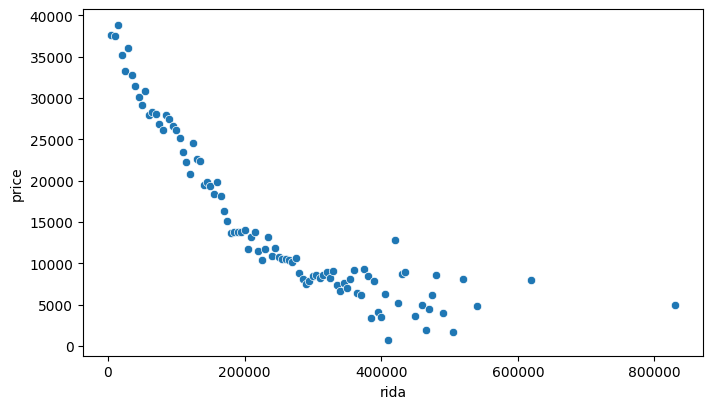

In [7]:
df_rid_gr = df[['R5000', 'price']].groupby('R5000').mean(numeric_only=True).reset_index()
fig, ax = plt.subplots(figsize=(8, 4.5))

sns.scatterplot(data=df_rid_gr, x=df_rid_gr['R5000'], y=df_rid_gr['price'])
ax.set_xlabel('rida')
plt.show()


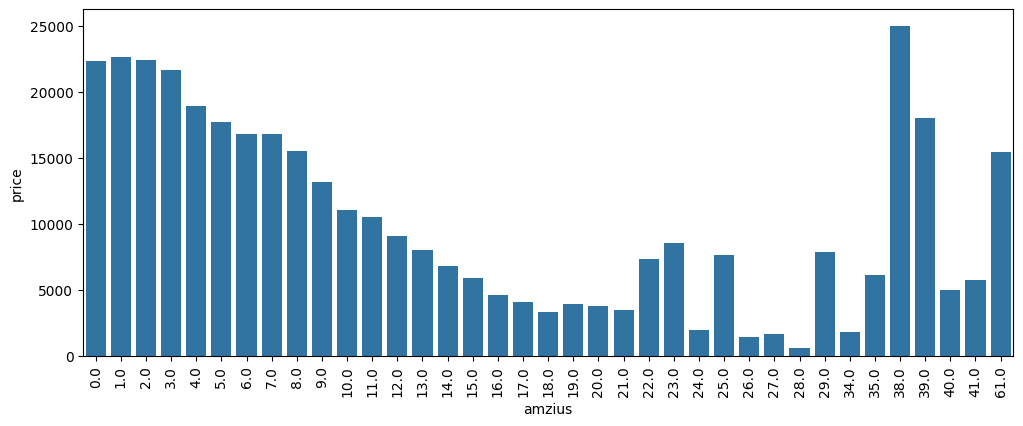

In [8]:
df_amz_gr = df[['amzius', 'price']].groupby('amzius').mean(numeric_only=True).reset_index()
# df.groupby('amzius').mean(numeric_only=True).reset_index()
fig, ax = plt.subplots(figsize=(12, 4.5))

sns.barplot(data=df_amz_gr, x=df_amz_gr['amzius'], y=df_amz_gr['price'])
# sns.barplot(data=df, x=df['amzius'], y=df['price'])
ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()


In [39]:
df.columns

Index(['ID', 'Marke', 'Modelis', 'Kaina', 'Rida', 'Variklis', 'Kuras',
       'PavaruDeze', 'VarantiejiRatai', 'BaterijosTalpakWh',
       'ElektraNuvažiuojamasAtstumas', 'Ikraunamas', 'Defektai', 'Spalva',
       'KebuloTipas', 'Vairas', 'VidutinesSanaudos', 'MiesteSanaudos',
       'UzmiestyjeSanaudos', 'PirmaRegistracija',
       'PirmosiosRegistracijosSalis', 'BendrojiMase', 'NuosavaMase',
       'DuruSkaicius', 'KebuloNr', 'Ilgis', 'Aukstis', 'TechApžiuraIki',
       'COemisijagkm', 'EuroStandartas', 'TarsosMokestis', 'SDK',
       'KlimatoValdymas', 'SedimosVietos', 'Ratlankiai', 'price', 'amzius',
       'rid', 'galia', 'R5000'],
      dtype='object')

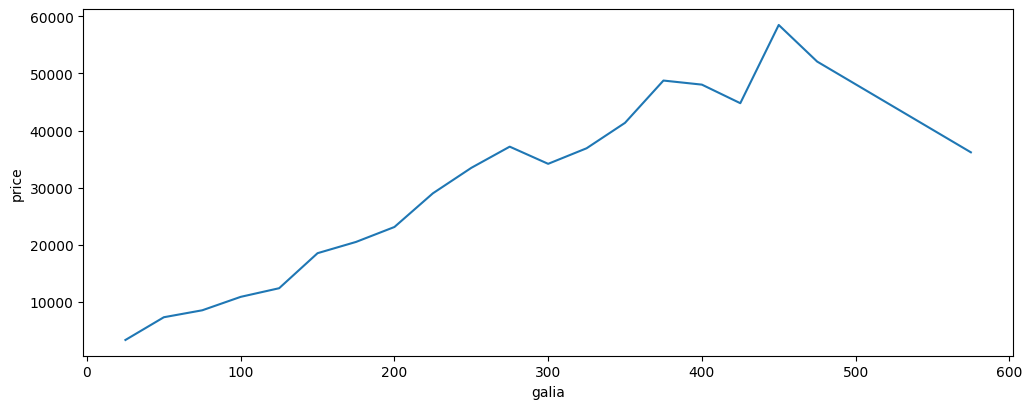

In [10]:
df['galia50'] = df[df['galia'] != 'None']['galia'].apply(lambda x: (np.ceil(x/25) * 25))
df_galia_gr = df[['galia50', 'price']].groupby('galia50').mean(numeric_only=True).reset_index()


fig, ax = plt.subplots(figsize=(12, 4.5))

sns.lineplot(data=df_galia_gr, x=df_galia_gr['galia50'], y=df_galia_gr['price'])
ax.set_xlabel('galia')
# sns.barplot(data=df, x=df['amzius'], y=df['price'])
# ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()

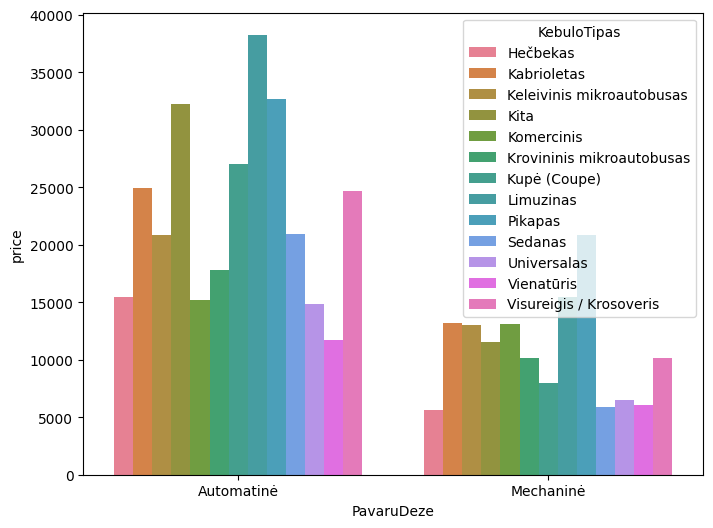

In [11]:
# dfpopgamintojai = df[df['gamintojas'].isin(top10)]
df_tipas = df[(df['PavaruDeze'] != 'None')][['PavaruDeze', 'KebuloTipas', 'price']]
df_tipas_gr = df_tipas.groupby(['PavaruDeze', 'KebuloTipas']).mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_tipas_gr, x='PavaruDeze', y='price', hue='KebuloTipas')

# ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()


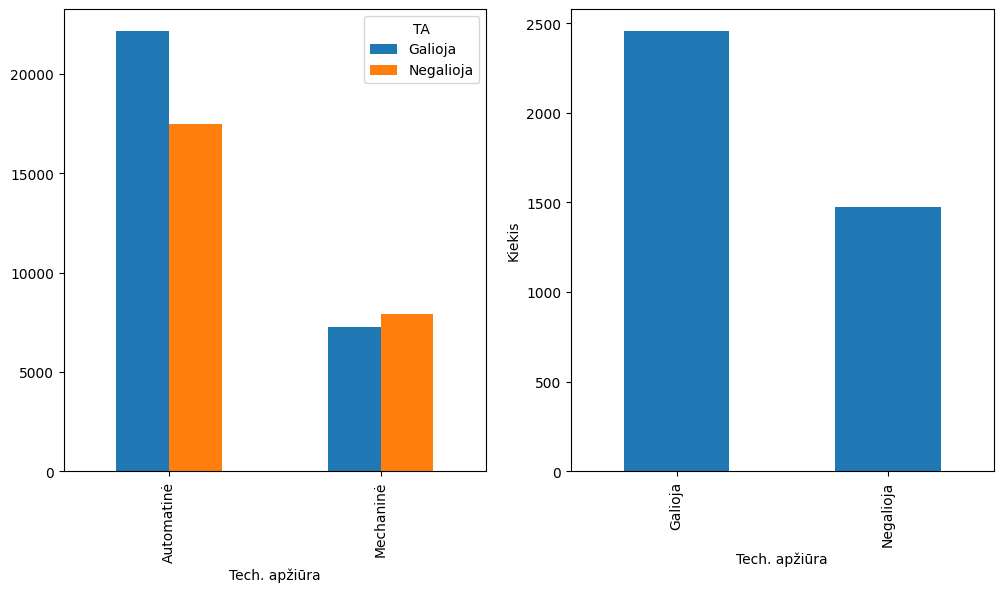

In [28]:
def TA(x):
    if x != 'None':
        return 'Galioja'
    else:
        return 'Negalioja'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df['TA'] = df['TechApžiuraIki'].apply(TA)

df[(df['PavaruDeze'] != 'None')].groupby(['PavaruDeze','TA'])['price'].mean(numeric_only=True).unstack().plot(kind='bar' , legend=True, xlabel='Tech. apžiūra', ax=ax1)
df.groupby('TA')['price'].count().plot(kind='bar' , ylabel='Kiekis', xlabel='Tech. apžiūra', ax=ax2)
plt.show()